### Training Multi-Layered Neural Network
- https://security.kiwi/docs/training-neural-networks/
-  a small multi-layered network designed to compute XOR arguments


Logic gates
- the basic building block of digital systems, taking one or more binary inputs and creating a single binary output based on internal logic, transistors perform these actions in computer electronics
- can be connected to create more complex multi-input/output circuits which perform operations such as addition, subtraction, multiplication, inversion etc


Logical operation in Neural Networks
- Neurons in a network can represent the logical operators (AND, OR, NOT).

XOR
- Exclusive OR or XOR provides a logical structure which specifics that only one of the inputs is true, not both

Building a Neural Network to Compute XOR
- utilise scikit-learns multi-layer perceptron
- visualise the decision boundaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


Plot algorithm decision boundary
- http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [13]:
def plot_decision_boundary(classifier, X, y, title):
    xmin, xmax = np.min(X[:, 0]) - 0.05, np.max(X[:, 0]) + 0.05
    ymin, ymax = np.min(X[:, 1]) - 0.05, np.max(X[:, 1]) + 0.05
    step = 0.01

    cm = plt.cm.coolwarm_r

    thr = 0.0

    xx, yy = np.meshgrid(np.arange(xmin - thr, xmax + thr, step), np.arange(ymin - thr, ymax + thr, step))
    
    if hasattr(classifier, 'decision_function'):
        Z = classifier.decision_function(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])))
    else:
        Z = classifier.predict_proba(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])))[:,1]
    
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8)    
    plt.colorbar()
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000','#0000FF']), alpha=0.6)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)    
    plt.xticks((0.0, 1.0))    
    plt.yticks((0.0, 1.0))
    plt.title(title)

Train XOR Neural Network

- use Scikit-learn multi-layer perceptron (**MLP**)  
- **hidden_layer_sizes** represents the number of hidden layers within the multi-layer perceptron. In our code below we have 5 layers, one more than our illustrative diagram.  
- **activation** specifies the activation function.
- **max_iter** is the maximum number of training iterations.
- **random_state** represents a state to starting point for weight and bias initialisation, a value here allows reproducible results across runs, it doesn’t actually set the weight or bias to the value entered.

Set input samples

In [5]:
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.double)
y_XOR = np.array([0,1,1,0])

Create a MLPClassifier

In [8]:
mlp = MLPClassifier(
    hidden_layer_sizes=(5,),
    activation='tanh',
    max_iter=10000,
    random_state=10
)

Train the model

In [9]:
mlp.fit(X, y_XOR)

MLPClassifier(activation='tanh', hidden_layer_sizes=(5,), max_iter=10000,
              random_state=10)

Plot decision boundary

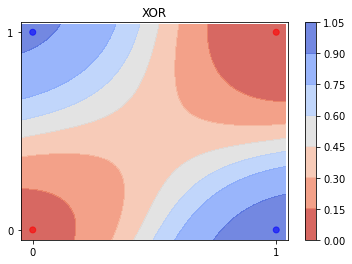

In [14]:
plot_decision_boundary(mlp, X, y_XOR, 'XOR')
plt.show()

Get predictions

In [15]:
pred = mlp.predict_proba(X)
print("MLP's XOR probabilities:\n[class0, class1]\n{}".format(pred))

MLP's XOR probabilities:
[class0, class1]
[[0.90824236 0.09175764]
 [0.08283202 0.91716798]
 [0.04569506 0.95430494]
 [0.95730544 0.04269456]]
